## BBM 409 - Programming Assignment 1

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Yusuf Küçüköner 2210356092

## Understanding Perceptron Learning Algorithm (100 points +5 points)

### 1. Data Loading and Exploration (5 points)
* Brief overview of the task.
* Description of the dataset used for analysis.

In [1]:
## Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


C:\Users\Yusuf\AppData\Local\Temp\ipykernel_16496\4165330157.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
# Features and target variables
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 
  
# metadata 
print(banknote_authentication.metadata) 
  
# variable information 
print(banknote_authentication.variables) 

{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [3]:
## Read the regression data and transform it into a Numpy array collection.(?)
## (See pandas and numpy functions)

data = pd.DataFrame(X, columns=['variance', 'skewness', 'curtosis', 'entropy'])

data['class'] = y



Lets explore the dataset by checking some important informations.


In [4]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.

print("\nFirst few rows:")
print(data.head())

print("\nSize of dataset:")
print(data.shape)

print("\nFeatures in dataset:")
print(data.columns)

print("\nTarget variable in dataset:")
print(data['class'].unique())

print("\nSummary statistics:")
print(data.describe())

print("\nMissing values:")
print(data.isnull().sum())


First few rows:
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Size of dataset:
(1372, 5)

Features in dataset:
Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

Target variable in dataset:
[0 1]

Summary statistics:
          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.

In [5]:
# Convert the DataFrame to a Numpy array
data = data.to_numpy()

X = data[:,:4]
y = data[:,4]

print(X)
print(y)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[0. 0. 0. ... 1. 1. 1.]


### 2. Data Preprocessing (5 points)
Explain the preprocessing steps taken and their rationale.

#### Feature Scaling Techniques:
Feature scaling is important for many machine learning algorithms, especially those based on distance metrics (e.g., k-nearest neighbors, support vector machines) and gradient descent optimization (e.g., linear regression, logistic regression).

Some common feature scaling techniques include:

1. **Standardization (Z-score normalization):** It scales the features to have a mean of 0 and a standard deviation of 1.
2. **Min-Max Scaling:** It scales the features to a fixed range, typically between 0 and 1.
3. **Robust Scaling:** It scales the features based on percentiles, making it robust to outliers.

You can use these scaled features for training your machine learning models.

Remember, the choice of feature selection and feature scaling techniques can significantly impact the performance of your models. It's essential to experiment and choose the techniques that work best for your specific dataset and machine learning tasks.

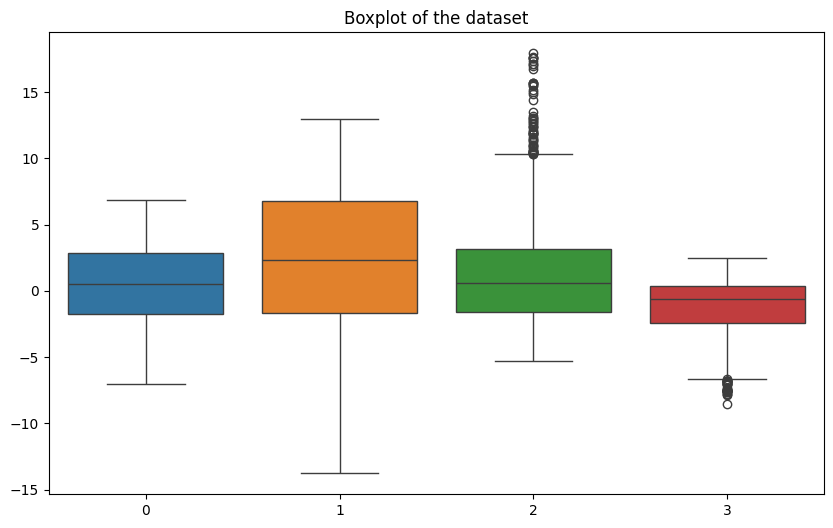

In [6]:
## Analyze the dataset and decide whether scaling is needed. 
## Explain your choices in a brief comment.

plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title("Boxplot of the dataset")
plt.show()

#### Explanation For Data Preprocessing | Analyzing the data by boxplot method.
##### Box plot is a great way to see if scaling is needed or not: As demonstrated above, the data is not uniformly scaled across all attributes, the range changes based on the attribute, so we need to apply scaling.


#### Training and Validation Split
1. Explain why it’s important to use the validation set to evaluate your model instead
of relying solely on the training data. 
2. Discuss how evaluating the model on unseen
data helps in assessing its generalization capability.

#### Explanation
1) Imagine a football game where the team's primary goal is to win against other teams. Even if the team's practice is great, if the opposing team presents unexpected strategies, the football team may fail to win. Using a validation set to evaluate your model is crucial because it helps prevent overfitting, providing an unbiased assessment of the model's performance on unseen data. This ensures that the model generalizes well and can perform effectively in real-world scenarios, rather than just memorizing the training data.

2) As I explained above: If the football team performs well against different unexpected strategies, we can say that the team is skilled and capable of adapting to various challenges. Evaluating a model on unseen data helps assess its generalization capability by simulating real-world scenarios. If the model performs well on this data, it indicates that it can effectively adapt to new, previously unencountered examples, confirming its ability to generalize beyond the training dataset. As Hacer hoca said: "Think of it like receiving a signal and inputting it into the model. If we can generalize the signal well, then the model is considered good."

In [7]:
# Split the dataset into training and testing sets (80% train, 20% test) without using sklearn

np.random.seed(0)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

split = int(0.8 * len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]


mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std



# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)



Shape of X_train: (1097, 4)
Shape of X_test: (275, 4)
Shape of Y_train: (1097,)
Shape of Y_test: (275,)


### 3. Implementing Perceptron for Binary Classification (20 points)

Explain the reason behind the application of perceptron learning algorithm on this type of data.

The perceptron learning algorithm works best with linearly seperable data sets. Since this data is binary and probably linearly seperable we are using perceptron learning algorithm.

In [8]:
## Implement Percepton Learning Algorithm

def perceptron(X, y, learning_rate=0.1, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.random.rand(n_features)
    bias = 0
    for _ in range(epochs):
        for i in range(n_samples):
            y_pred = np.dot(X[i], weights) + bias
            update1 = update(y_pred, y[i])
            weights += update1 * X[i] * learning_rate
            bias += update1 * learning_rate
        

    return weights, bias

def update(y_pred, y_target):
    a = activationSign(y_pred)
    if(y_target == 1 and a == 0):
        return 1
    elif(y_target == 0 and a == 1):
        return -1
    else:
        return 0
    

def activationSign(y_pred):
    if y_pred >= 0:
        return 1
    else:
        return 0
    

def predict(X, weights, bias):
    predictions =  np.dot(X, weights) + bias
    return np.array([activationSign(x) for x in predictions])
    

Discuss how the choice of learning rate and the number of epochs might affect the
training process. What happens with a very small or very large learning rate?

#### Explanation
Let's start with learning rate: If the learning rate is very small, the model converges slowly. It may get stuck in local minima and it may requires so much epoch. If the learning rate is very high, the weights are changing so rapidly and quickly, for example lets say with a small change in weights we can reach the optimal solution but when the learning rate is very high we can miss the optimal solution and keep oscillating. 

Too few epochs: Model can't learn exactly because it didn't see the data enough basically underfitting.

Too much epochs: Model seen the data so much and it memorized it(which is not good for generalization and we are looking for generalization) so model works poorly when unseen data given into.

In [9]:
# Accuracy implementation (TF + TP) / (TF + TP + FN + FP)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


#### Train the Perceptron

In [10]:
## Train the Perceptron model on the training set.

weights, bias = perceptron(X_train, y_train)
print(weights, bias) # Checking the weights in case of overfitting.

[-3.85216063 -4.19608928 -3.68625675 -0.10978189] -1.8000000000000003


#### Prediction on Training Data

In [11]:
# Predicting on the training data
predictions_train = predict(X_train, weights, bias)
print(predictions_train)

accuracy_train = accuracy(y_train, predictions_train)
print("Training Accuracy:", accuracy_train)

[1 0 1 ... 0 0 0]
Training Accuracy: 0.9872379216043756


### 4. Evaluating Perceptron for Binary Classification (25 points)

#### Prediction on Validation Data

In [12]:
# Evaluate the model's performance on the test set by calculating accuracy.
predictions_test =  predict(X_test, weights, bias)

accuracy_test = accuracy(y_test, predictions_test)


print("Testing Accuracy:", accuracy_test)

Testing Accuracy: 0.9927272727272727


Answer the Guiding Questions:
1. What does accuracy tell us about the performance of the model?
2. Why is accuracy sometimes not enough, especially in cases where the data is imbal-
anced? Explain a scenario where a high accuracy might be misleading.

#### Explanation

1) It says how many of the classes are predicted correctly basically shows the mathematical equation of: Correct Predictions/Total Predictions
2) Consider the COVID tests we had a few years ago. Let’s say there is a database with 10 COVID-positive individuals and 990 COVID-negative individuals. If the model works with 99% accuracy but fails to identify any of the COVID-positive individuals, can we say that it performs well? We cannot, because the test does not work correctly.
​


In [13]:
def calculate_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))

    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp)
    recall = tp / np.sum(y_true == 1)
    f1 = 2 * precision * recall / (precision + recall)

    return accuracy, precision, recall, f1

accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_train.flatten(), predictions_train)

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1 Score: {f1_train}")

print("\n")

accuracy_test, precision_test, recall_test, f1_test = calculate_metrics(y_test.flatten(), predictions_test)

print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_test}")




Training Accuracy: 0.9872379216043756
Training Precision: 0.9794661190965093
Training Recall: 0.9916839916839917
Training F1 Score: 0.9855371900826446


Test Accuracy: 0.9927272727272727
Test Precision: 1.0
Test Recall: 0.9844961240310077
Test F1 Score: 0.9921875


Answer the Guiding Questions:
1. In what types of problems is precision more important than recall? Give an example
scenario where high precision is desirable but low recall might be acceptable.
2. In what cases is recall more critical? Discuss an example where missing true positives
is more harmful than having false positives.
3. When is the F1 score a better measure than accuracy? Explain why balancing
precision and recall is important in some contexts.
4. What are the limitations of using F1 score alone?

Explanation:
1. Imagine a situation where doctors are treating patients with a specific disease. This treatment is tailored for those individuals and should not be applied to healthy people without the disease, as it could be harmful or even fatal to them. Therefore, it is crucial to accurately identify and find individuals who are sick to ensure that the treatment is only administered to those who truly need it.
2. For example, in the context of COVID-19, recall was more important than precision. Since COVID is infectious and the treatment is straightforward with minimal side effects for both infected and healthy individuals, the key priority was to identify those who were ill. This was crucial because the virus is highly contagious, and finding infected individuals quickly helped to control the spread of the disease.
3. Accuracy becomes unreliable when the data is imbalanced, as illustrated in the previous example(In the section accuracy). For instance, in the case of a rare disease that affects only 0.1% of the population, accuracy fails to provide meaningful insights unless it is 100%. In such scenarios, a high accuracy rate can be misleading, as it may not reflect the model's ability to correctly identify the few individuals who are actually affected.
4. The F1 score, while useful, has several limitations when used alone. It ignores true negatives, which can be significant in cases with a large majority class. Additionally, the F1 score may not be suitable for all contexts; for instance, in medical screening, high recall might be prioritized over precision. While the F1 score is designed to address class imbalance, it can still be misleading in extreme class imbalance scenarios.

### 5. Visualization of the Hyperplane (40 + 5 points)

In this section, you will explore how the Perceptron Learning Algorithm forms the de-
cision boundary (or hyperplane) that separates the two classes. To be able to do that
you will reduce the feature space to two dimensions, train the Perceptron on the selected
features, and visualize the hyperplane. The goal is to understand how the Perceptron
changes the decision boundary as the data changes, and how it adapts based on the
features used.

#### Step 1: Feature Selection Using Correlation Analysis (10 points)

1. Correlation Analysis: One effective way to reduce the number of features is by
analyzing the correlation between them. Highly correlated features may provide re-
dundant information, so you can select two less correlated features for visualization.
2. Compute the correlation matrix: Analyze the relationship between the four features
(variance, skewness, kurtosis, and entropy) to identify pairs of features with low
correlation.

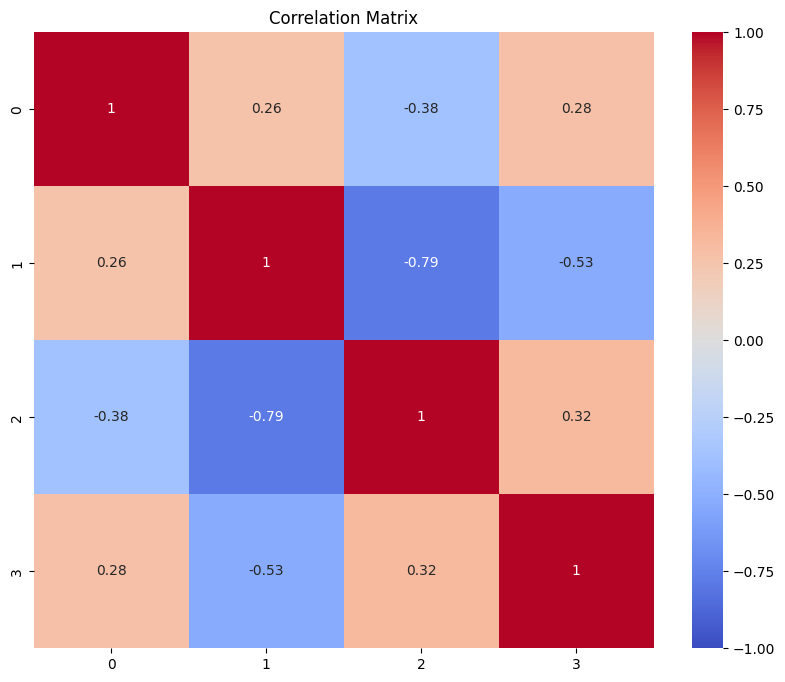

In [14]:
# Compute the correlation matrix from numpy array
correlation_matrix = np.corrcoef(X, rowvar=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

3. Choose two features: Based on the correlation analysis, select two features that are
least correlated (e.g., variance and skewness) to visualize the Perceptron’s decision
boundary.

Explanation:
We know index 0 -> variance, 1 -> skewness, 2-> curtosis, 3-> entropy. And based on the correlation matrix we need to pick either variance and entropy or variance and skewness.

In [15]:
def select_features(X_train, X_test, feature_indices):
    X_train_selected = X_train[:, feature_indices]
    X_test_selected = X_test[:, feature_indices]

    weights_selected, bias_selected = perceptron(X_train_selected, y_train)
    predictions_train_selected = predict(X_train_selected, weights_selected, bias_selected) 
    accuracy_train_selected = accuracy(y_train, predictions_train_selected)
    print(f"Training Accuracy with selected features {feature_indices}: {accuracy_train_selected}")

    predictions_test_selected = predict(X_test_selected, weights_selected, bias_selected)
    accuracy_test_selected = accuracy(y_test, predictions_test_selected)
    print(f"Testing Accuracy with selected features {feature_indices}: {accuracy_test_selected}")
    
    return X_train_selected, X_test_selected, weights_selected, bias_selected




#### Step 2: Train the Perceptron on Selected Features (10 points)

1. Retrain the Perceptron: After selecting two features, train the Perceptron using
only these two features. Use the same training and evaluation process as before,
but now the model will work in a two-dimensional feature space.

In [16]:

X_train_selected, X_test_selected, weights_selected, bias_selected = select_features(X_train, X_test, [0, 1])
print("\n")
X_train_selected1, X_test_selected1, weights_selected1, bias_selected1 = select_features(X_train, X_test, [0, 2])
print("\n")
X_train_selected2, X_test_selected2, weights_selected2, bias_selected2 = select_features(X_train, X_test, [1,2])
print("\n")
X_train_selected3, X_test_selected3, weights_selected3, bias_selected3 = select_features(X_train, X_test, [1,3])
print("\n")
X_train_selected4, X_test_selected4, weights_selected4, bias_selected4 = select_features(X_train, X_test, [2,3])



Training Accuracy with selected features [0, 1]: 0.7511394712853237
Testing Accuracy with selected features [0, 1]: 0.7490909090909091


Training Accuracy with selected features [0, 2]: 0.8340929808568824
Testing Accuracy with selected features [0, 2]: 0.8072727272727273


Training Accuracy with selected features [1, 2]: 0.6280765724703737
Testing Accuracy with selected features [1, 2]: 0.6036363636363636


Training Accuracy with selected features [1, 3]: 0.7474931631722881
Testing Accuracy with selected features [1, 3]: 0.7381818181818182


Training Accuracy with selected features [2, 3]: 0.5487693710118505
Testing Accuracy with selected features [2, 3]: 0.4727272727272727


As seen above, features with high correlation tend to reduce accuracy, as they often convey the same information.

2. Visualize the decision boundary (hyperplane): Once the Perceptron is trained, plot
the decision boundary (hyperplane) to see how the Perceptron separates the two
classes in 2D.

In [ ]:
def plot_decision_boundary(X, y, weights, bias,feature1,feature2):
    positive_class = y == 1
    negative_class = y == 0

    plt.scatter(X[positive_class, 0], X[positive_class, 1], c='blue', edgecolors='k', marker='o', label='Positive (+)')
    plt.scatter(X[negative_class, 0], X[negative_class, 1], c='red', edgecolors='k', marker='x', label='Negative (-)')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_vals = np.linspace(x_min, x_max, 100)
    x2_vals = -(weights[0] * x1_vals + bias) / weights[1]

    x_min2, x_max2 = X[:, 1].min() - 1, X[:, 1].max() + 1
    x2_vals_indexes = (x2_vals >= x_min2) & (x2_vals <= x_max2)
    x1_vals = x1_vals[x2_vals_indexes]
    x2_vals = x2_vals[x2_vals_indexes]


    plt.plot(x1_vals, x2_vals, color='black', linestyle='--', label='Decision Boundary')

    midpoint = np.array([np.mean(x1_vals), -(weights[0] * np.mean(x1_vals) + bias) / weights[1]])

    normal_vector = weights / np.linalg.norm(weights)

    plt.arrow(midpoint[0], midpoint[1], normal_vector[0], normal_vector[1], 
              color='green', head_width=0.2, head_length=0.3, label='Normal Vector')

    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Perceptron Decision Boundary')
    plt.legend()

    plt.show()


C:\Users\Yusuf\AppData\Local\Temp\ipykernel_16496\2346122438.py:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[negative_class, 0], X[negative_class, 1], c='red', edgecolors='k', marker='x', label='Negative (-)')


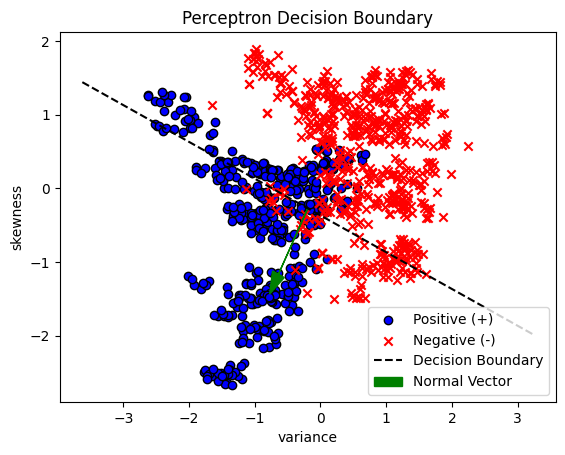

In [26]:
plot_decision_boundary(X_train_selected, y_train, weights_selected, bias_selected,'variance','skewness')

#### Step 3: Experiment with Different Features (10 points)

After visualizing the decision boundary for one pair of features, try selecting different
combinations of features (e.g., variance and entropy) and retrain the Perceptron. Compare
how the hyperplane changes with different features. This helps in understanding how the
Perceptron’s decision-making process adapts to different feature sets.

Answer the guiding
questions:
1. How does the decision boundary change when you use different pairs of features?
2. Can you find a pair of features that leads to better separation between the two
classes?

Explanation:

1. When using different feature pairs, the decision boundary shifts because each pair creates a unique view of the data. Some features may be more effective at separating classes, whil    e others could overlap more, making separation difficult.

2. If two values are highly correlated, they don’t provide unique information, as each feature largely reflects the other. Therefore, they’re less likely to reveal anything that one feature alone couldn’t show. To find the best separation, we can try feature pairs with lower correlations, as these have a better chance of providing complementary information and improving class separation.

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_16496\2346122438.py:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[negative_class, 0], X[negative_class, 1], c='red', edgecolors='k', marker='x', label='Negative (-)')


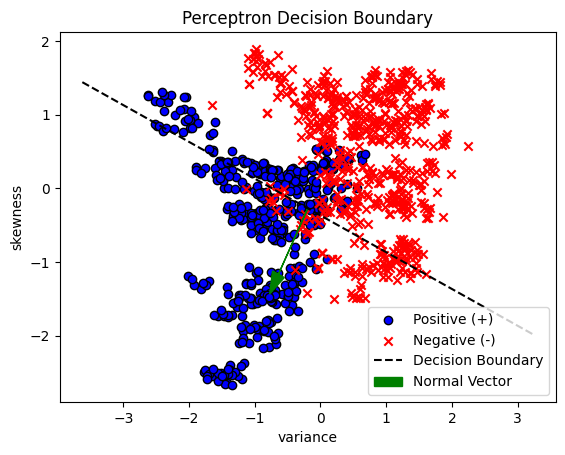

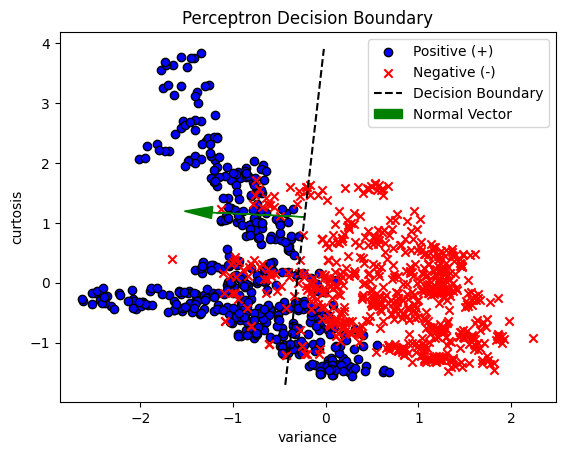

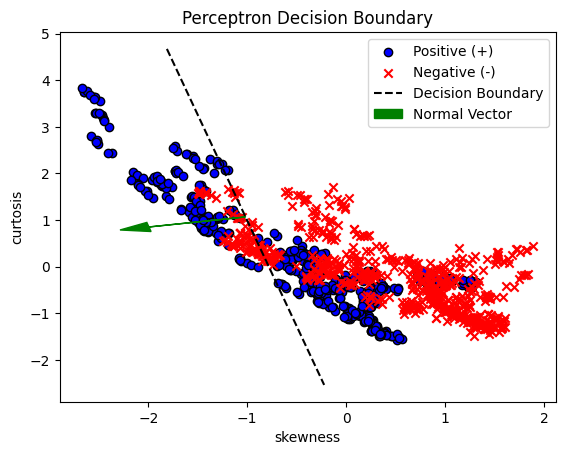

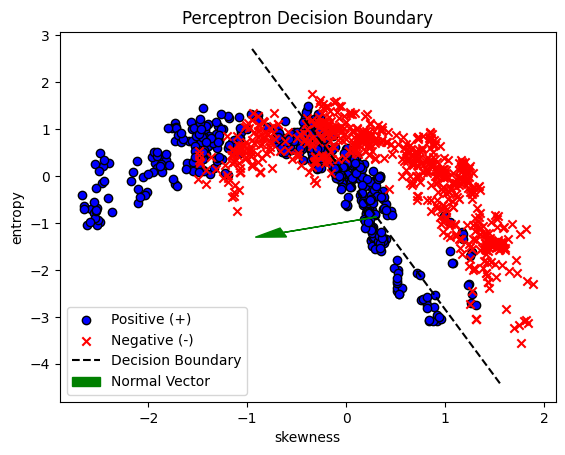

In [27]:
plot_decision_boundary(X_train_selected, y_train, weights_selected, bias_selected,'variance','skewness')
plot_decision_boundary(X_train_selected1, y_train, weights_selected1, bias_selected1,'variance','curtosis')
plot_decision_boundary(X_train_selected2, y_train, weights_selected2, bias_selected2,'skewness','curtosis')
plot_decision_boundary(X_train_selected3, y_train, weights_selected3, bias_selected3,'skewness','entropy')

#### Bonus Step 4: Incrementally Add Data (+ 5 points)

1. Visualizing Incremental Learning: Another experiment to help understand the behavior of the Perceptron is to add data incrementally. Start with a small portion of
the dataset and progressively add more data points to train the Perceptron.

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_16496\3671118448.py:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[negative_class, 0], X[negative_class, 1], c='red', edgecolors='k', marker='x', label='Negative (-)')


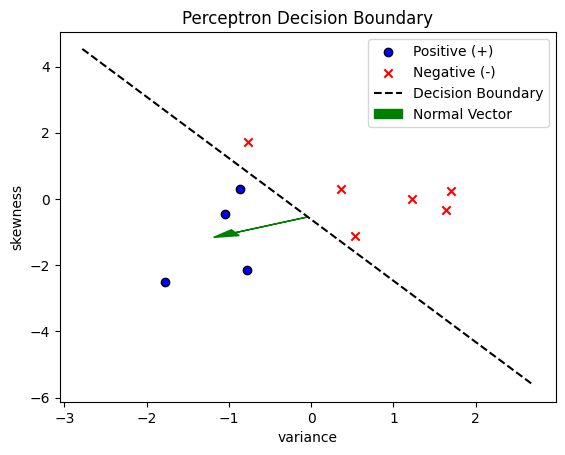

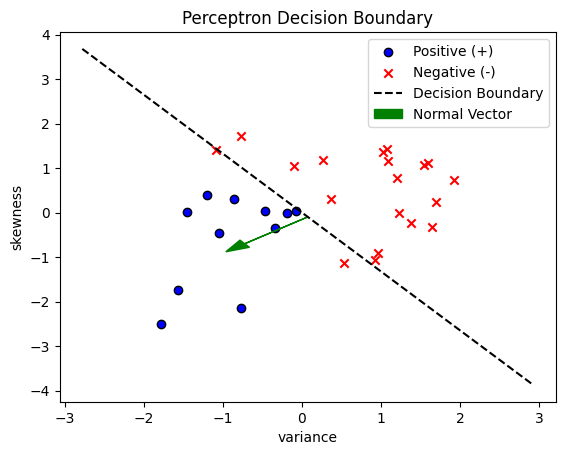

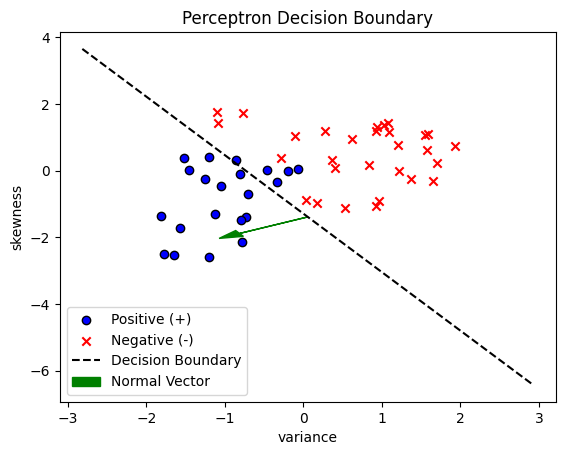

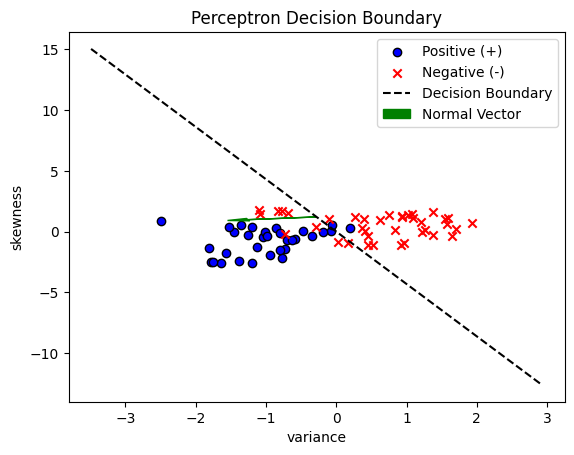

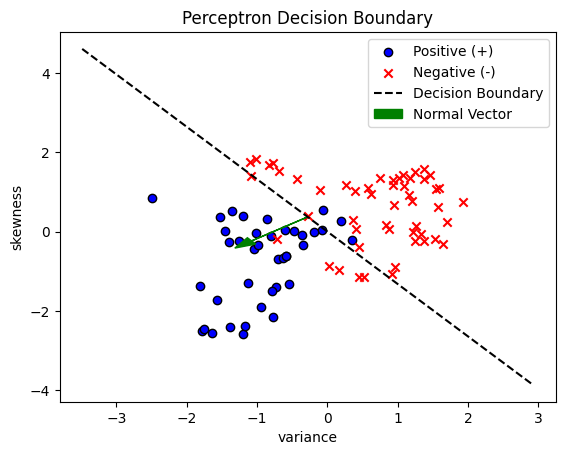

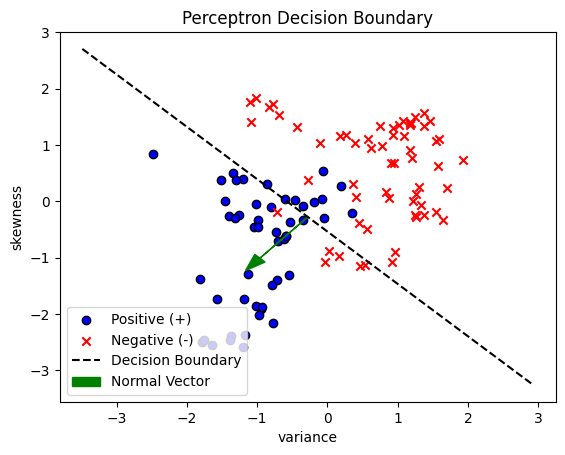

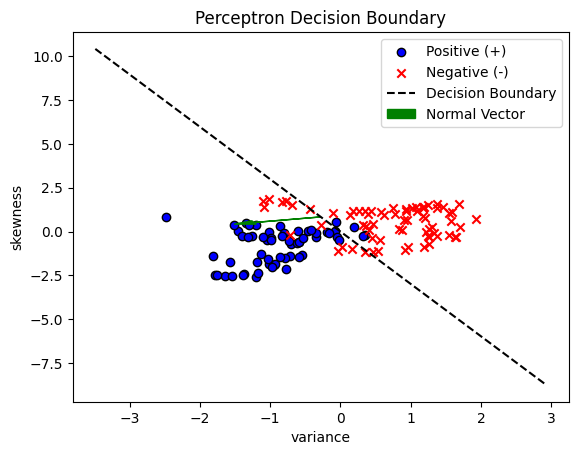

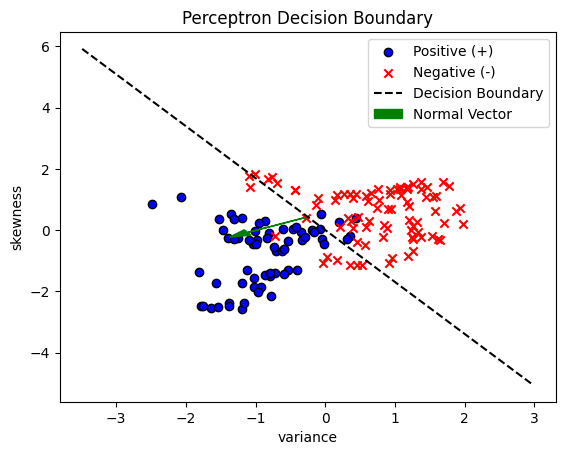

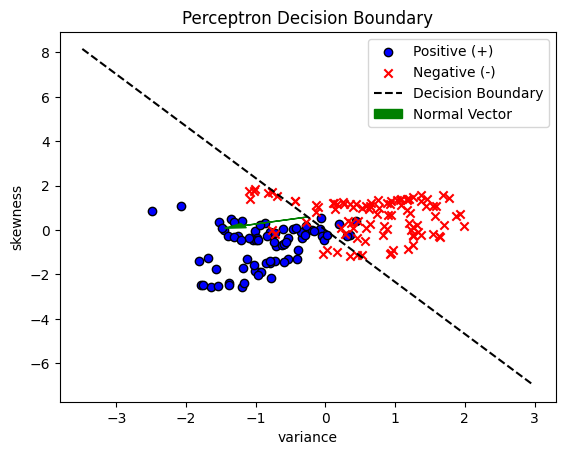

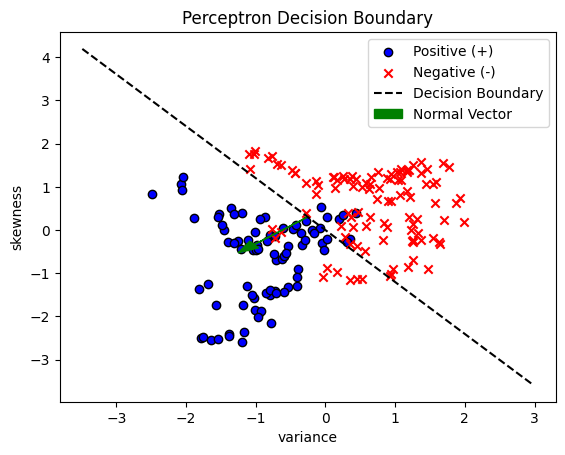

In [20]:
def train_and_plot_decision_boundary(X_train, y_train, feature_indices, sample_size):
    X_train_selected = X_train[:, feature_indices]
    weights_selected, bias_selected = perceptron(X_train_selected[:sample_size], y_train[:sample_size])
    plot_decision_boundary(X_train_selected[:sample_size], y_train[:sample_size], weights_selected, bias_selected, 'variance', 'skewness')

for sample_size in range(10, 200, 20):
    train_and_plot_decision_boundary(X_train, y_train, [0, 1], sample_size)


2. Observe how the decision boundary shifts: As you add more data, observe how the
hyperplane shifts and adapts to new points. This will help you understand how the
Perceptron continuously adjusts the boundary to separate the classes.

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_16496\3671118448.py:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[negative_class, 0], X[negative_class, 1], c='red', edgecolors='k', marker='x', label='Negative (-)')


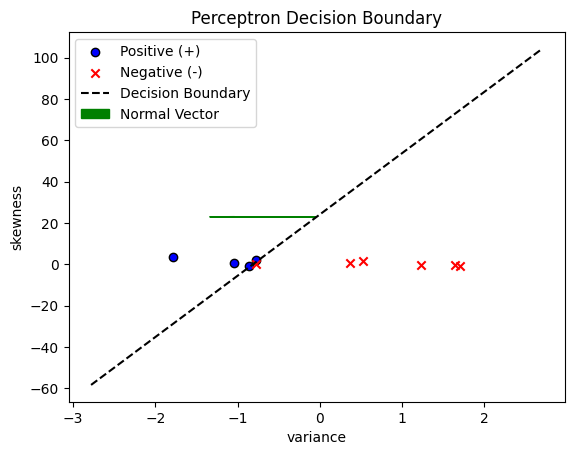

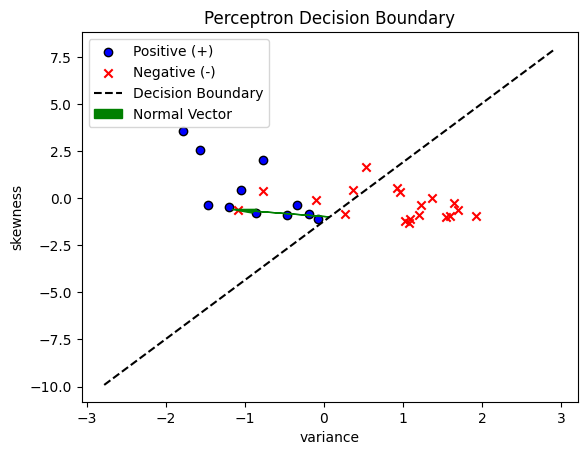

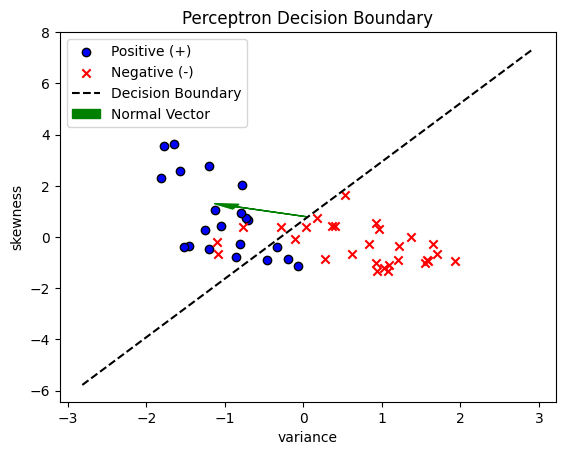

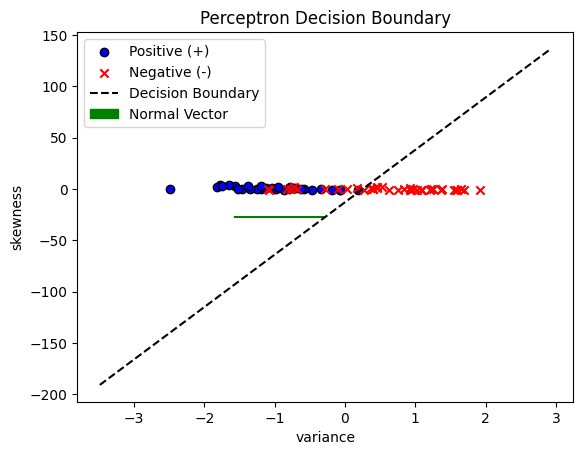

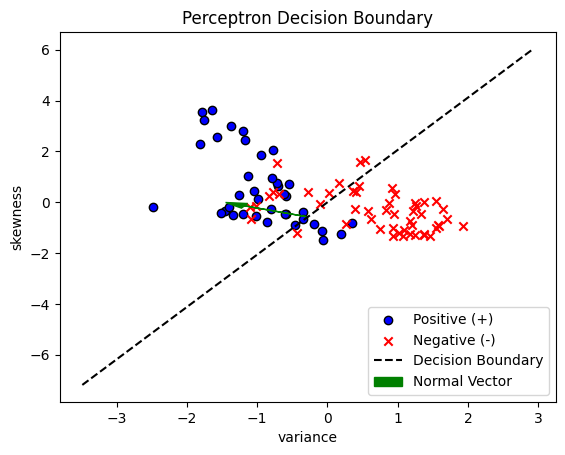

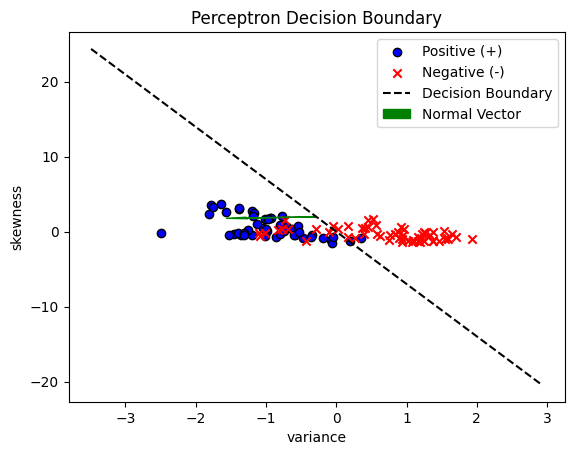

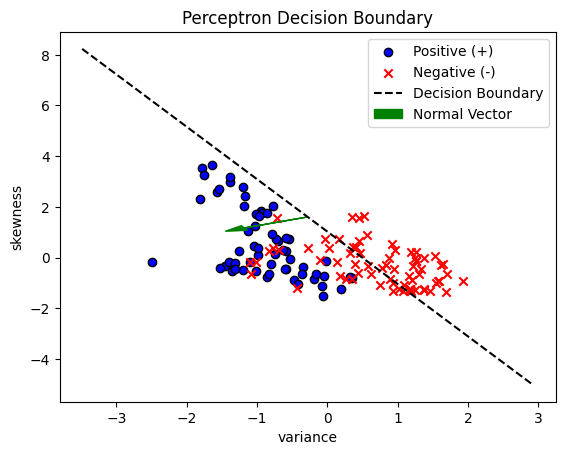

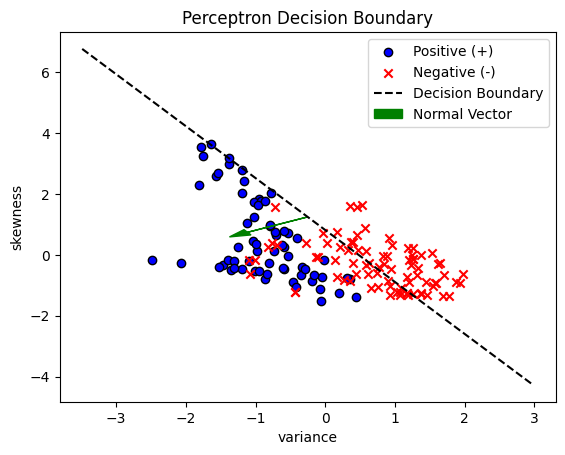

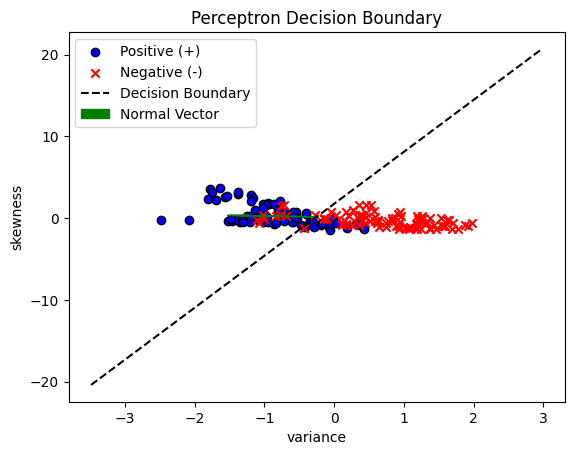

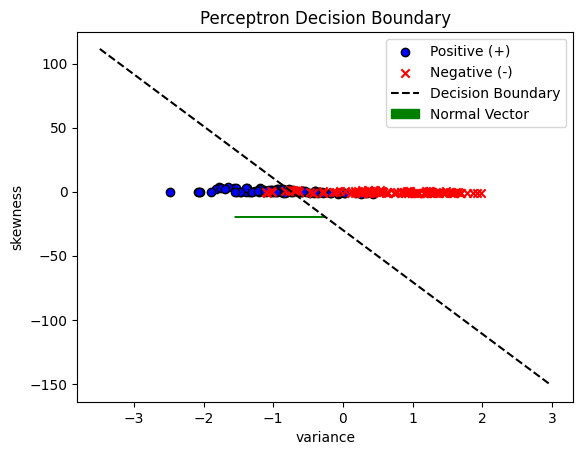

In [21]:
for sample_size in range(10, 200, 20):
    train_and_plot_decision_boundary(X_train, y_train, [0, 2], sample_size)

#### Step 5: Analyzing the Hyperplane (5 points)

After running the experiments, analyze the hyperplane’s behavior across different feature
sets and data inputs. Reflect on how the Perceptron algorithm adapts to the data and how
different feature combinations lead to different decision boundaries. Anwer the guiding
questions:
1. Why does the hyperplane change with different features or data points?
2. How does the decision boundary relate to the linearly separable nature of the data?

Explanation:

1. The hyperplane shifts due to variations in feature correlations and separations. When features are less correlated or more distinctly separated, the positioning of the hyperplane adjusts accordingly. This is because the perceptron model is geometry-based, relying on the data to find the optimal dividing boundary.
2. The decision boundary is a line (in 2D) or hyperplane (in higher dimensions) that separates data points from different classes. For linearly separable data, there exists at least one straight line or hyperplane that can perfectly separate the classes with no overlap. In such cases, the decision boundary is positioned in a way that clearly divides the classes

#### Step 6: Fisher’s Linear Discriminant Projection (10 points)

In this step, you will implement Fisher’s Linear Discriminant (LD) to project the
dataset onto a 1D space and visualize the distribution of the two classes in the projected
space using a histogram. The goal of Fisher’s LD is to find the direction in the feature
space that maximizes the separation between two classes while minimizing the variance
within each class. This technique projects the data onto a single dimension where the
separation between the classes is optimized.

In [22]:
def fisher_ld_projection(X, y):
    X0 = X[y == 0]
    X1 = X[y == 1]

    mean0 = np.mean(X0, axis=0)
    mean1 = np.mean(X1, axis=0)

    Sw = np.dot((X0 - mean0).T, (X0 - mean0)) + np.dot((X1 - mean1).T, (X1 - mean1))

    w = np.dot(np.linalg.inv(Sw), mean1 - mean0)

    return w

def project_data(X, direction):

    projection = np.dot(X, direction)
    return projection

In [23]:
direction = fisher_ld_projection(X_train,y_train)

projected_data = project_data(X_train,direction)

While not mandatory, it can be highly instructive to visualize the projection direction computed by Fisher’s LD in the original 2D feature space. This will help you understand how the data is being projected onto a 1D space and why this direction is optimal for class separation.

Plot a histogram showing the distribution of the
projected data for each class in the 1D space. The histogram will help you visualize
how well the two classes are separated by the Fisher’s LD projection.

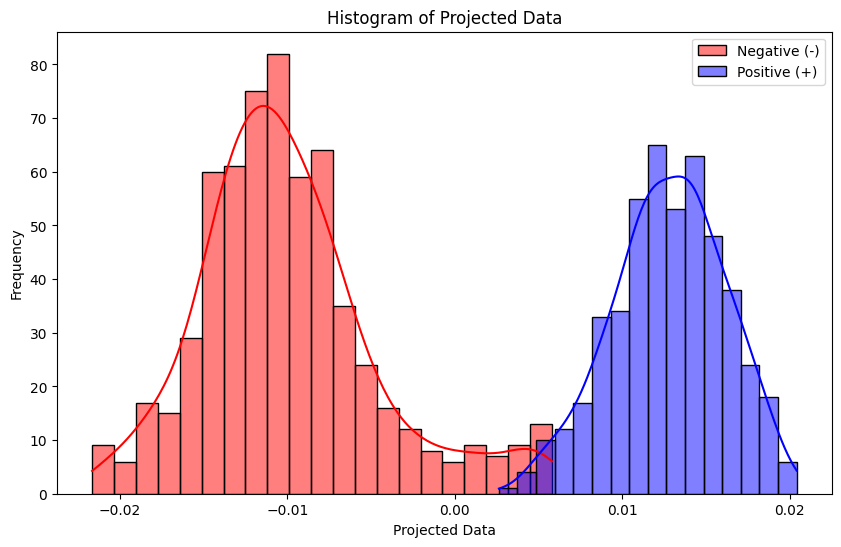

In [24]:
# Plot the histogram of the projected data

plt.figure(figsize=(10, 6))
sns.histplot(projected_data[y_train == 0], color='red', kde=True, label='Negative (-)')
sns.histplot(projected_data[y_train == 1], color='blue', kde=True, label='Positive (+)')
plt.title('Histogram of Projected Data')
plt.xlabel('Projected Data')
plt.ylabel('Frequency')
plt.legend()
plt.show()




Answer the guiding questions:
1. How well does Fisher’s LD separate the two classes in the 1D projected space?
2. Compare the separation of the two classes in the original 2D space (used in the
Perceptron) versus the 1D Fisher’s LD projection. What do you observe about the
class distributions in these spaces?

Explanation:
1. The algorithm performs well, which isn’t surprising since Fisher's Linear Discriminant (FLD) works similarly to the perceptron in that both aim to linearly separate data. While each method has its unique approach, they both find boundaries for class separation. The perceptron shows high accuracy, and, judging by the histogram, Fisher's method would likely achieve high accuracy too with an optimal threshold selection.
2. In the original 2D space used by the perceptron, the two classes may overlap, and the linear boundary might not effectively separate them, making it harder to distinguish between the classes. In the 1D projection from Fisher's Linear Discriminant, the data is represented on a single line, which clarifies the separation between the classes. This projection makes it easier to visualize the differences, as the classes appear as distinct groups along the line, highlighting their separation more clearly than in the original 2D space.